In [2]:
import os
import pickle as pkl
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib as mpl
sys.path.append("/Users/cosinga/code/figrid/")
sys.path.append("/Users/cosinga/code/sparta_dev/analysis/")
from figrid.data_sort import DataSort
if not os.path.exists("/Users/cosinga/code/splots/datasort/massf_sort.pkl"):
    from halo_func_sort import main as hfsmain
    path = "/Users/cosinga/sims/sparta_output/L0063_N0256_CBol/moria_trees/moria_tree_orb_defs.hdf5"
    outpath = '/Users/cosinga/code/splots/datasort/massf_sort.pkl'
    ds = hfsmain(path, outpath)
else:
    def load() -> DataSort:
        return pkl.load(open("/Users/cosinga/code/splots/datasort/massf_sort.pkl", 'rb'))
    ds = load()


In [3]:
print(ds)

function
	prof
	host_mass
	sub_mass
	sub_frac
host_cut
	_
	1.00e+11_1.00e+12
sub_cut
	_
	2.73e+10_
frac_cut
	0.00e+00_
host_type
	parent_id_cat
	parent_id_orbinf
	none
	sub_cat
	sub_orbinf
redshift
	0
	0.3
	0.5
	1
	1.5
	2
	4
boxsize
	62.5
mptl
	1090498600.0
snapshot
	184
	163
	152
	129
	111
	96
	55
full_mdef_str
	M200m_all_spa
	Mvir_all_spa
	Morb-all_all_spa
	Morb-all_orb_spa
	Mpeak
	Mpeak-orb
mass_def
	M200m
	Mvir
	Morb-all
	Mpeak
	Mpeak-orb
ptl_sel
	all
	orb
	
is_internal
	false
is_host
	true
	false
orb_htype
	false
	true
nhalos
	18277
	19151
	19825
	21147
	21109
	19894
	9063
	3052
	2998
	3124
	2947
	2458
	1877
	379
	2240
	2085
	2105
	1747
	1239
	822
	105
	15225
	16153
	16701
	18200
	18651
	18017
	8684
	16037
	17066
	17720
	19400
	19870
	19072
	8958



In [8]:
for dc in ds.dclist:
    nhalos = dc.get('nhalos')
    if not nhalos == 'no key found' and dc.get('full_mdef_str') == 'Mpeak':
        print(dc.get('redshift'), dc.get('host_type'))
        print(dc.get('nhalos'))

0 none
18277
0.3 none
19151
0.5 none
19825
1 none
21147
1.5 none
21109
2 none
19894
4 none
9063
0 sub_cat
3052
0.3 sub_cat
2998
0.5 sub_cat
3124
1 sub_cat
2947
1.5 sub_cat
2458
2 sub_cat
1877
4 sub_cat
379
0 sub_orbinf
2240
0.3 sub_orbinf
2085
0.5 sub_orbinf
2105
1 sub_orbinf
1747
1.5 sub_orbinf
1239
2 sub_orbinf
822
4 sub_orbinf
105
0 parent_id_cat
15225
0.3 parent_id_cat
16153
0.5 parent_id_cat
16701
1 parent_id_cat
18200
1.5 parent_id_cat
18651
2 parent_id_cat
18017
4 parent_id_cat
8684
0 parent_id_orbinf
16037
0.3 parent_id_orbinf
17066
0.5 parent_id_orbinf
17720
1 parent_id_orbinf
19400
1.5 parent_id_orbinf
19870
2 parent_id_orbinf
19072
4 parent_id_orbinf
8958


# Halo Mass Function

The row values for full_mdef_str: ['Morb-all_all_spa', 'Mvir_all_spa', 'Mpeak-orb']
The column values for redshift: [0, 0.3, 0.5, 1, 1.5, 2, 4]


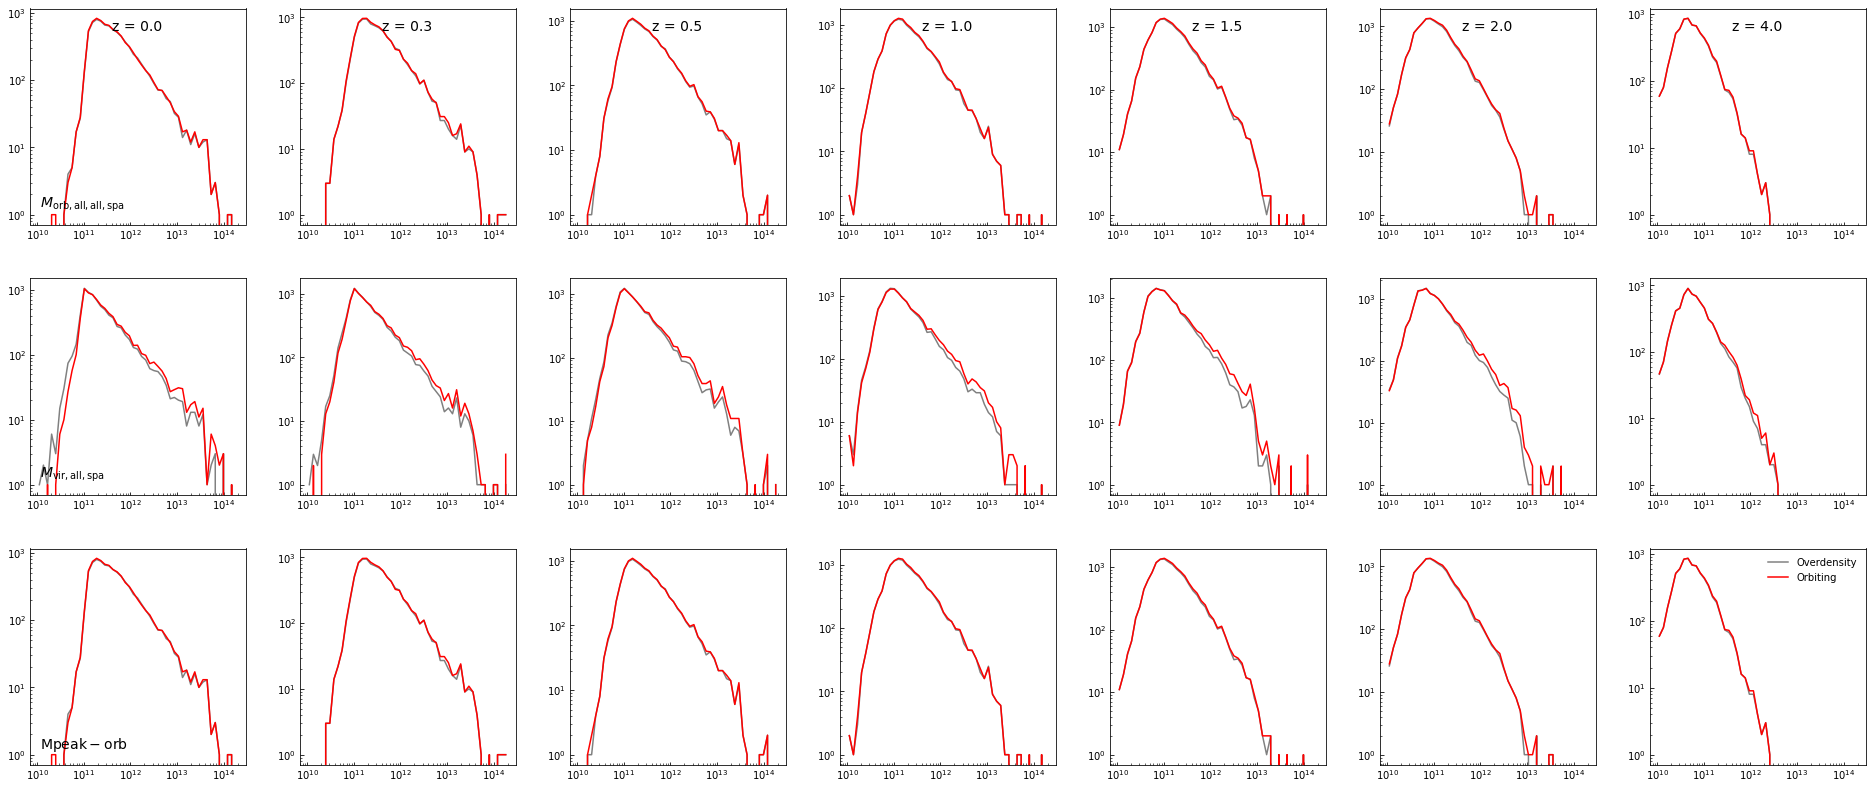

In [10]:
ip = {'full_mdef_str':['Morb-all_all_spa', 'Mvir_all_spa', 'Mpeak-orb'], 'function':'host_mass', 'host_type':['parent_id_cat', 'parent_id_orbinf']}
fg = ds.figrid('host_type', 'full_mdef_str', 'redshift', ip)
fg.setXLabel('$M_h$')
fg.setYLabel(r'$\frac{dN}{dM_h}$')
fg.plot()

In [12]:
# checking the counts of the two histograms
ip = {'full_mdef_str':'Morb-all_all_spa', 'function':'host_mass', 'redshift':0}
ip['host_type'] = 'parent_id_orbinf'
orb = ds.getMatching(ip)
print(len(orb) == 1)
orb = orb[0]
print(orb.get('nhalos'))
print(np.sum(orb.getData()[1]))

True
16037
7987


I'm unsure why the orbiting mass definitions look basically identical in the overdensity and orbiting subhalo definitions. The actual masses of the halos that are hosts in both ovd and orb should stay the same, but the number of parent halos should be changing between the definitions. It makes sense for the virial mass definition to have more host halos when using the orbiting definition, since some subhalos are now counted as their own halos.

Counting the halos, at z = 0. The overdensity definition has 15225 parent halos, while the orbiting definition has 16037 parent halos, so it seems that only 800 halos or so end up switching. Maybe that's why the 

# Subhalo Mass Function

The row values for full_mdef_str: ['Morb-all_all_spa', 'Mpeak-orb', 'Mvir_all_spa']
The column values for redshift: [0, 0.3, 0.5, 1, 1.5, 2, 4]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


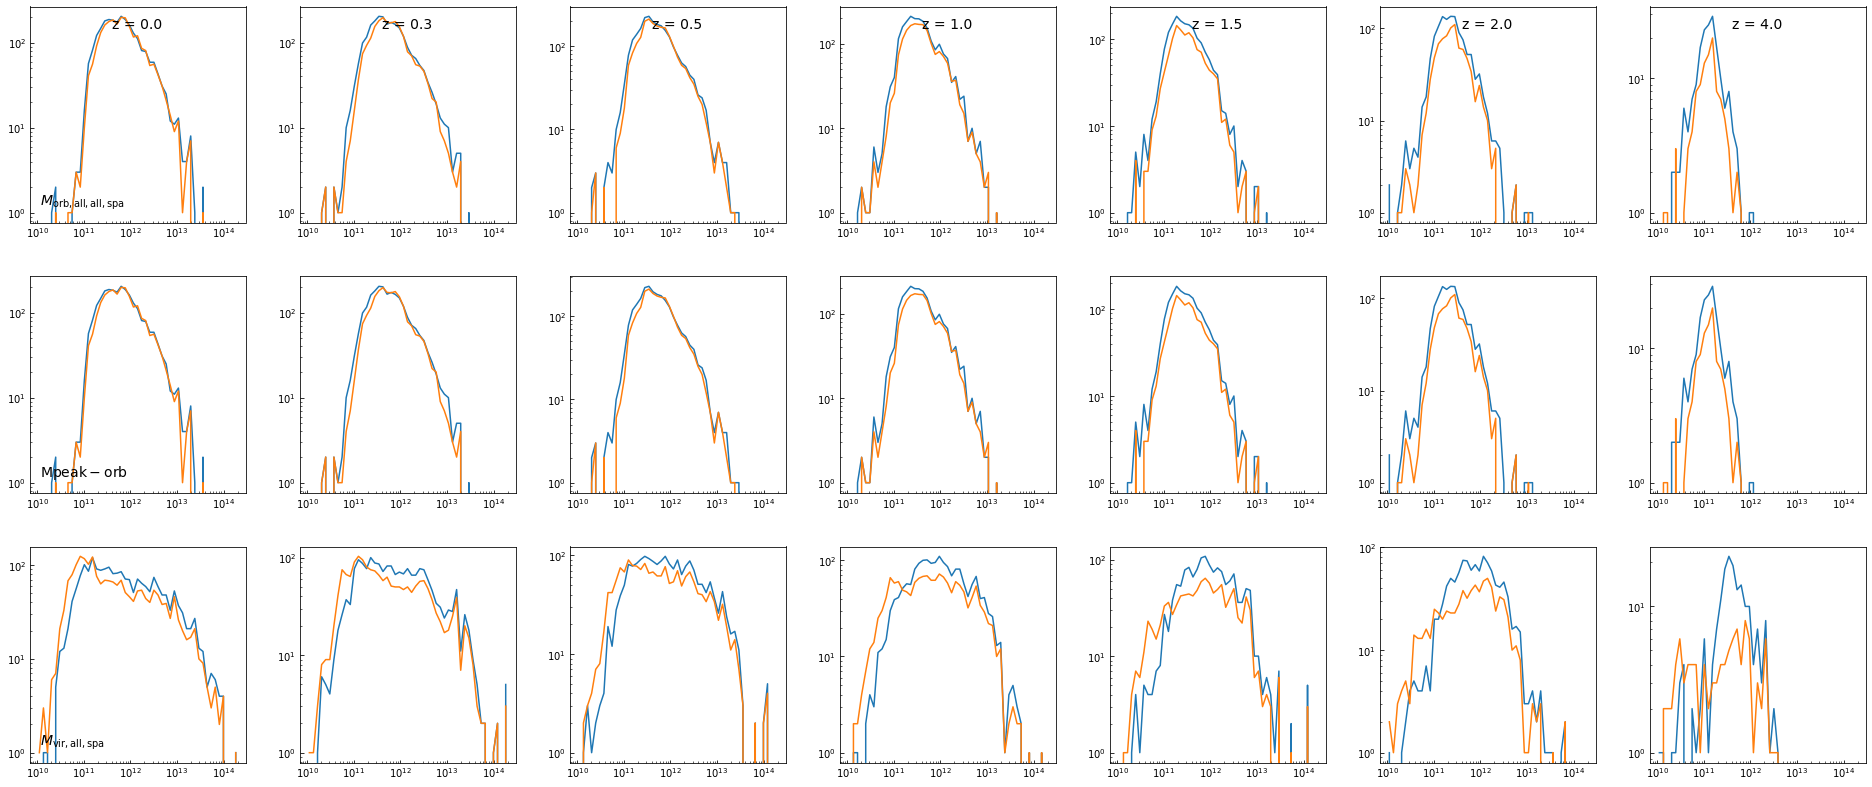

In [12]:
ip = {'full_mdef_str':['Morb-all_all_spa', 'Mpeak-orb', 'Mvir_all_spa'], 'function':'host_mass', 'host_type':['sub_cat', 'sub_orbinf']}
# how is Morb calculated for 
fg = ds.figrid('host_type', 'full_mdef_str', 'redshift', ip)
fg.plot()

Again, the orbiting masses don't seem to change drastically between the ovd and orb subhalo definitions.

# Cumulative Subhalo Mass Fractions

The row values for host_cut: ['_', '1.00e+11_1.00e+12']
The column values for redshift: [0, 0.5, 1, 2]
['_', 'no key found', '2.73e+10_']


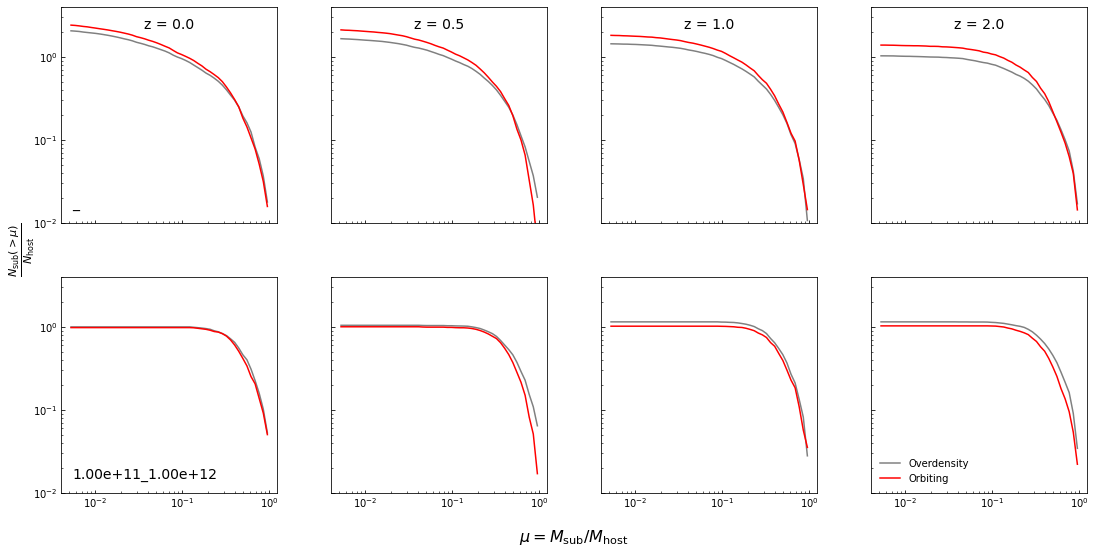

In [20]:
ip = {'full_mdef_str':'Morb-all_all_spa', 'function':'sub_mass', 'host_type':['parent_id_cat', 'parent_id_orbinf'], 'host_cut':['_'], 'redshift':[0, 0.5, 1, 2]}
fg = ds.figrid('host_type', 'host_cut', 'redshift', ip)
fg.setYLabel(r'$\frac{N_{\mathrm{sub}} (> \mu)}{N_{\mathrm{host}}}$')
fg.setXLabel(r'$\mu = M_{\mathrm{sub}} / M_{\mathrm{host}}$')
fg.setDefaultTicksParams()
fg.axisArgs(ylim = (1e-2, 4))
fg.legendArgs(loc = 'lower left')
print(ds.getAttrVals('sub_cut'))
fg.plot()

Ok interesting plot - I don't think this simulation has the resolution to really glean any significant information from making host/sub mass cuts.

In [36]:
# perform checks
err_hosts = np.where(mass[cath_mask] == -1)
mass_status[snap_idx, err_hosts[0]]

array([], dtype=int8)

/var/folders/79/98r4p1nd3v19cl5z3dbndg_c0000gn/T/ipykernel_39249/2446706921.py:30: RuntimeWarning: invalid value encountered in divide
  plt.plot(mid, orb_hist / cat_hist)
/var/folders/79/98r4p1nd3v19cl5z3dbndg_c0000gn/T/ipykernel_39249/2446706921.py:48: RuntimeWarning: divide by zero encountered in divide
  plt.plot(mid, orb_hist / cat_hist)
/var/folders/79/98r4p1nd3v19cl5z3dbndg_c0000gn/T/ipykernel_39249/2446706921.py:48: RuntimeWarning: invalid value encountered in divide
  plt.plot(mid, orb_hist / cat_hist)


Text(0.5, 0, 'M_200m (Solar Masses)')

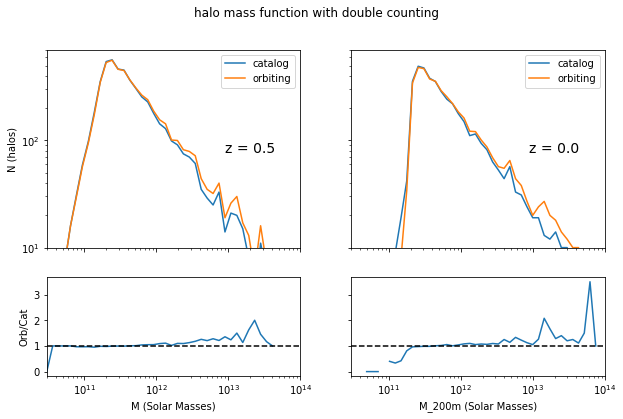

In [58]:
snap_idx = 151 # around 0.5
def get_hist(snap_idx):

    cath_mask = get_hosts(snap_idx, pid_cat)
    orbh_mask = get_hosts(snap_idx, pid_orb)
    mass_mask = mass > 0
    mbins = np.geomspace(np.min(mass[cath_mask & mass_mask]), np.max(mass[cath_mask & mass_mask]), 50)
    cat_hist, edges = np.histogram(mass[cath_mask & mass_mask], mbins)
    orb_hist, edges = np.histogram(mass[orbh_mask & mass_mask], mbins)
    mid = (edges[:-1] + edges[1:]) / 2
    return mid, cat_hist, orb_hist

fig, axes = plt.subplots(2, 2, sharex = 'all', sharey = 'row', 
        gridspec_kw = {'height_ratios':[1, 0.5]}, figsize = (10, 6))
fig.suptitle('halo mass function with double counting')

plt.sca(axes[0, 0])
mid, cat_hist, orb_hist = get_hist(snap_idx)
plt.plot(mid, cat_hist, label = 'catalog')
plt.plot(mid, orb_hist, label = 'orbiting')
plt.legend(loc = 'upper right')
plt.loglog()
plt.text(0.9, 0.5, 'z = %.1f'%snapz[snap_idx], transform = axes[0, 0].transAxes,
        ha = 'right', va = 'center', fontsize = 14)
plt.ylim(10, 7e2)
plt.xlim(3e10, 1e14)
plt.ylabel('N (halos)')

plt.sca(axes[1, 0])
plt.plot(mid, orb_hist / cat_hist)
plt.axhline(1, linestyle = 'dashed', color = 'black')
plt.ylabel('Orb/Cat')
plt.xlabel('M_200m (Solar Masses)')
# second column
snap_idx = -10
plt.sca(axes[0, 1])
mid, cat_hist, orb_hist = get_hist(snap_idx)
plt.plot(mid, cat_hist, label = 'catalog')
plt.plot(mid, orb_hist, label = 'orbiting')
plt.legend(loc = 'upper right')
plt.loglog()
plt.text(0.9, 0.5, 'z = %.1f'%snapz[snap_idx], transform = axes[0, 1].transAxes,
        ha = 'right', va = 'center', fontsize = 14)
plt.ylim(10, 7e2)
plt.xlim(3e10, 1e14)

plt.sca(axes[1, 1])
plt.plot(mid, orb_hist / cat_hist)
plt.axhline(1, linestyle = 'dashed', color = 'black')
plt.xlabel('M_200m (Solar Masses)')


In [ ]:
def remove_subhosts(cath, orbh, mass):
    diff_mask = np.zeros_like(cath, dtype = bool)
    diff_mask[snap_idx, :] = ~cath[snap_idx] & orbh[snap_idx]
    